# Task06 PyTorch可视化

## 1 可视化网络结构

- 打印模型基础信息：使用`print()`函数，只能打印出基础构件的信息，不能显示每一层的shape和对应参数量的大小

In [3]:
import torchvision.models as models

model = models.resnet18()

In [4]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

- 可视化网络结构：使用`torchinfo`库进行模型网络的结构输出，可以得到更加详细的信息，包括模块信息（每一层的类型、输出shape和参数量）、模型整体的参数量、模型大小、一次前向或者反向传播需要的内存大小等

In [5]:
import torchvision.models as models
from torchinfo import summary

resnet18 = models.resnet18() # 实例化模型
# 其中batch_size为1，图片的通道数为3，图片的高宽为224
summary(model, (1, 3, 224, 224))

E:\LearningDisk\Learning_Projects\MyPythonProjects\my-team-learning\venv\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   --                        --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

## 2 CNN可视化

- CNN卷积核可视化

In [14]:
model = models.vgg11(pretrained=True)
dict(model.features.named_children())

{'0': Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '1': ReLU(inplace=True),
 '2': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 '3': Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '4': ReLU(inplace=True),
 '5': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 '6': Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '7': ReLU(inplace=True),
 '8': Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '9': ReLU(inplace=True),
 '10': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 '11': Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '12': ReLU(inplace=True),
 '13': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '14': ReLU(inplace=True),
 '15': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 '16': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), paddi

torch.Size([128, 64, 3, 3])


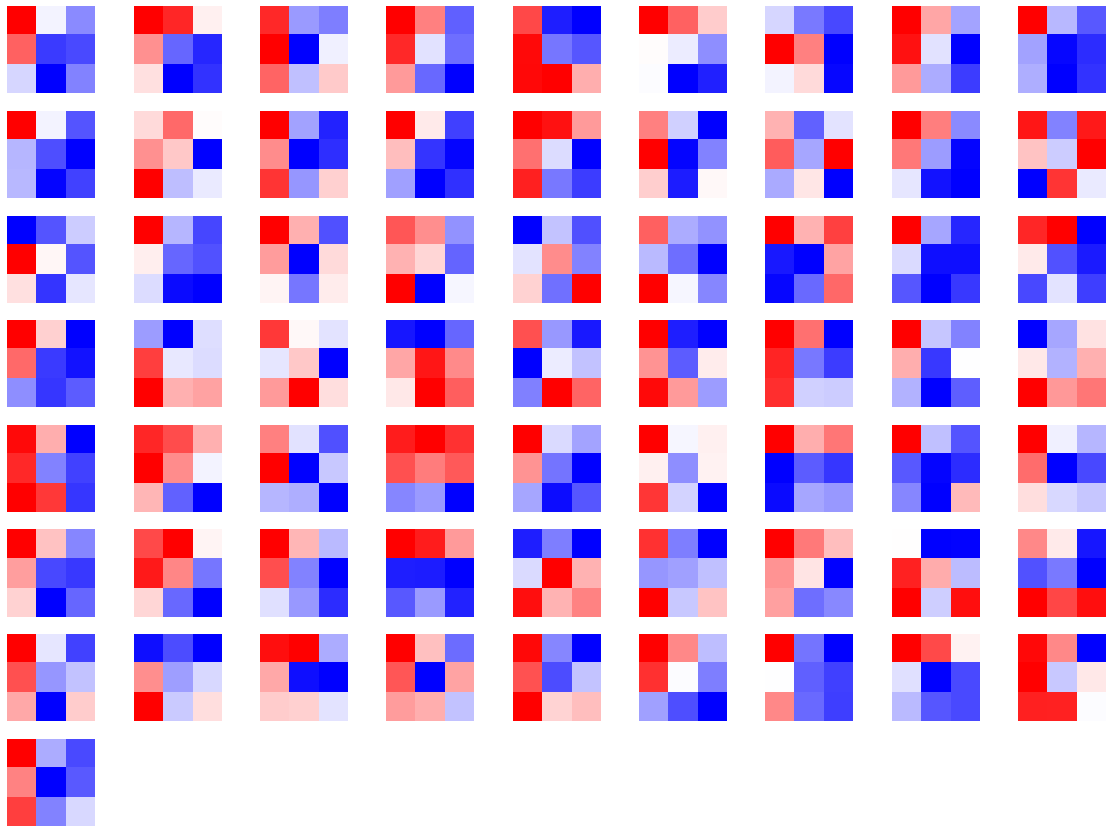

In [16]:
import matplotlib.pyplot as plt

conv1 = dict(model.features.named_children())['3']
# 得到第3层的卷积层参数
kernel_set = conv1.weight.detach()
num = len(conv1.weight.detach())
print(kernel_set.shape)
# 该代码仅可视化其中一个维度的卷积核，第3层的卷积核有128*64个
for i in range(0, 1):
    i_kernel = kernel_set[i]
    plt.figure(figsize=(20, 17))
    if (len(i_kernel)) > 1:
        for idx, filer in enumerate(i_kernel):
            plt.subplot(9, 9, idx+1) 
            plt.axis('off')
            plt.imshow(filer[ :, :].detach(),cmap='bwr')

- CNN特征图可视化：使用PyTorch提供的hook结构，得到网络在前向传播过程中的特征图。

- CNN class activation map可视化：用于在CNN可视化场景下，判断图像中哪些像素点对预测结果是重要的，可使用`grad-cam`库进行操作

- 使用FlashTorch快速实现CNDD可视化：可以使用`flashtorch`库，可视化梯度和卷积核

## 3 使用TensorBoard可视化训练过程

- 可视化基本逻辑：TensorBoard记录模型每一层的feature map、权重和训练loss等，并保存在用户指定的文件夹中，通过网页形式进行可视化展示

- 模型结构可视化：使用`add_graph`方法，在TensorBoard下展示模型结构

In [17]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size = 3)
        self.pool = nn.MaxPool2d(kernel_size = 2,stride = 2)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size = 5)
        self.adaptive_pool = nn.AdaptiveMaxPool2d((1,1))
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(64,32)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(32,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.adaptive_pool(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.sigmoid(x)
        return y

In [18]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (adaptive_pool): AdaptiveMaxPool2d(output_size=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [20]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./runs')
writer.add_graph(model, input_to_model = torch.rand(1, 3, 224, 224))
writer.close()

在当前目录下，执行`tensorboard --logdir=./runs`命令，打开TensorBoard可视化页面，看到模型网络结构。

![tensorboard可视化](images/ch06/01.png)

- 图像可视化：
  - 对于单张图片的显示使用`add_image`
  - 对于多张图片的显示使用`add_images`
  - 有时需要使用`torchvision.utils.make_grid`将多张图片拼成一张图片后，用`writer.add_image`显示

- 连续变量可视化：使用`add_scalar`方法，对连续变量（或时序变量）的变化过程进行可视化展示

In [21]:
for i in range(500):
    x = i
    y = x ** 2
    writer.add_scalar("x", x, i) #日志中记录x在第step i 的值
    writer.add_scalar("y", y, i) #日志中记录y在第step i 的值
writer.close()

- 参数分布可视化：使用`add_histogram`方法，对参数（或变量）的分布进行可视化展示

In [25]:
import numpy as np

# 创建正态分布的张量模拟参数矩阵
def norm(mean, std):
    t = std * torch.randn((100, 20)) + mean
    return t

for step, mean in enumerate(range(-10, 10, 1)):
    w = norm(mean, 1)
    writer.add_histogram("w", w, step)
    writer.flush()
writer.close()

## 4 总结

&emsp;&emsp;本次任务，主要介绍了PyTorch可视化，包括可视化网络结构、CNN卷积层可视化和使用TensorBoard可视化训练过程。
1. 使用`torchinfo`库，可视化模型网络结构，展示模块信息（每一层的类型、输出shape和参数量）、模型整体的参数量、模型大小、一次前向或者反向传播需要的内存大小等。
2. 使用`grad-cam`库，可视化重要像素点，能够快速确定重要区域，进行可解释性分析或模型优化改进。
3. 通过`TensorBoard`工具，调用相关方法创建训练记录，可视化模型结构、图像、连续变量和参数分布等。